# Capstone 1 Project: Data Story

By using the car accident data from 2016-2019, we are trying to find a model to predict the severity of the accident. Prior to this step, we cleaned the data and add some additional columns to convert dattime objects to different columns. In this step, we will write a data story to observe and visualize the data.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import the csv file that we cleaned in the prior project:
df = pd.read_csv(r'C:\\Users\Servet\Desktop\Jupyter_Notebooks\US_Accidents_cleaned1.csv')

In [3]:
# Check the Data Frames head
df.head()

,Unnamed: 0,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),...,Hour,Weekday,Nautical_Twilight_isnull,Sunrise_Sunset_isnull,Civil_Twilight_isnull,Astronomical_Twilight_isnull,Weather_Timestamp_isnull,Wind_Direction_isnull,Visibility(mi)_isnull,Number_isnull
0,0,A-1,MapQuest,201,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,...,5,Mon,0,0,0,0,0,0,0,1
1,1,A-2,MapQuest,201,2,2016-02-08 06:07:00,2016-02-08 06:37:00,39.928059,-82.831184,0.01,...,6,Mon,0,0,0,0,0,0,0,0
2,2,A-3,MapQuest,201,2,2016-02-08 06:49:00,2016-02-08 07:19:00,39.063148,-84.032608,0.01,...,6,Mon,0,0,0,0,0,0,0,1
3,3,A-4,MapQuest,201,3,2016-02-08 07:23:00,2016-02-08 07:53:00,39.747753,-84.205582,0.01,...,7,Mon,0,0,0,0,0,0,0,1
4,4,A-5,MapQuest,201,2,2016-02-08 07:39:00,2016-02-08 08:09:00,39.627781,-84.188354,0.01,...,7,Mon,0,0,0,0,0,0,0,1


In [4]:
# Get some summary details about the Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 73 columns):
Unnamed: 0                      1048575 non-null int64
ID                              1048575 non-null object
Source                          1048575 non-null object
TMC                             1048575 non-null int64
Severity                        1048575 non-null int64
Start_Time                      1048575 non-null object
End_Time                        1048575 non-null object
Start_Lat                       1048575 non-null float64
Start_Lng                       1048575 non-null float64
Distance(mi)                    1048575 non-null float64
Description                     1048575 non-null object
Number                          1048575 non-null float64
Street                          1048575 non-null object
Side                            1048575 non-null object
City                            1048548 non-null object
County                          1048575 non-nu

Since this is the cleaned version of the data, we do not have any missing cells.

Firstly, we would like visualize how many accidents happened in each state:

In [5]:
# We define an empty list: count_by_state
count_by_state=[]
for i in df.State.unique():
    count_by_state.append(df[df['State']==i].count()['ID'])

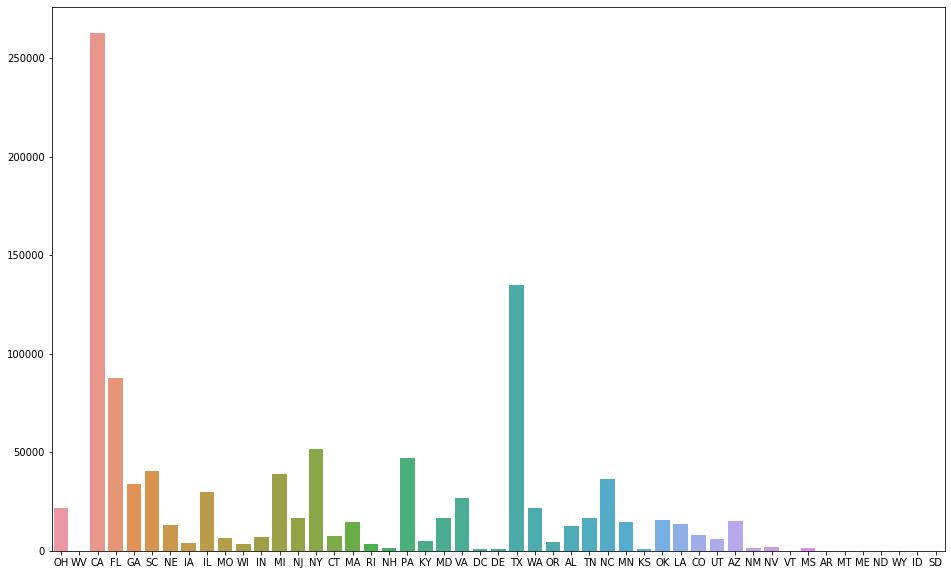

In [6]:
# Now, we will plot a bar plot to visualize the accident data by state
plt.figure(figsize=(16,10))
sns.barplot(df.State.unique(), count_by_state)

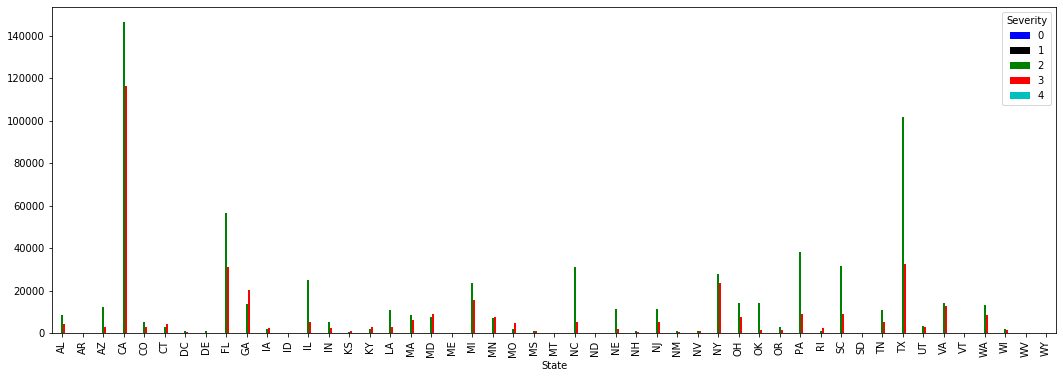

In [7]:
# Now we, will make a cross tab to visualize the severity of accidents in each state
x = pd.crosstab(index=df['State'],columns=df['Severity'])
x.plot(kind='bar',stacked=False, color=['b','k','g','r','c'],figsize=(18,6))
plt.show()

In [8]:
df.groupby('Severity')['State'].value_counts().tolist()

[3,
 2,
 2,
 1,
 1,
 1,
 1,
 186,
 75,
 51,
 27,
 25,
 20,
 17,
 15,
 13,
 13,
 13,
 11,
 11,
 10,
 9,
 9,
 9,
 9,
 7,
 5,
 5,
 4,
 4,
 3,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 146257,
 101942,
 56599,
 37955,
 31470,
 31038,
 27985,
 24922,
 23456,
 14253,
 14115,
 14113,
 13606,
 13358,
 12066,
 11176,
 11113,
 11010,
 10649,
 8640,
 8280,
 7472,
 7018,
 5303,
 5003,
 3190,
 3081,
 3059,
 1942,
 1844,
 1820,
 1766,
 1148,
 1147,
 1012,
 852,
 820,
 783,
 780,
 311,
 76,
 71,
 34,
 17,
 15,
 10,
 3,
 2,
 116251,
 32665,
 30978,
 23428,
 20156,
 15670,
 12756,
 9192,
 8904,
 8889,
 8347,
 7665,
 7651,
 6104,
 5390,
 5338,
 5263,
 5130,
 4873,
 4388,
 4158,
 3054,
 2963,
 2833,
 2762,
 2704,
 2430,
 2304,
 2173,
 1809,
 1458,
 1446,
 1310,
 833,
 811,
 752,
 526,
 406,
 339,
 108,
 79,
 79,
 75,
 26,
 22,
 13,
 5,
 2,
 206,
 114,
 95,
 65,
 35,
 34,
 29,
 26,
 22,
 21,
 21,
 20,
 19,
 17,
 17,
 16,
 16,
 15,
 12,
 11,
 10,
 10,
 7,
 6,
 6,
 5,
 5,
 5,
 4,
 4,
 3,
 3,
 3,
 3,
 2,
 2,
 2,


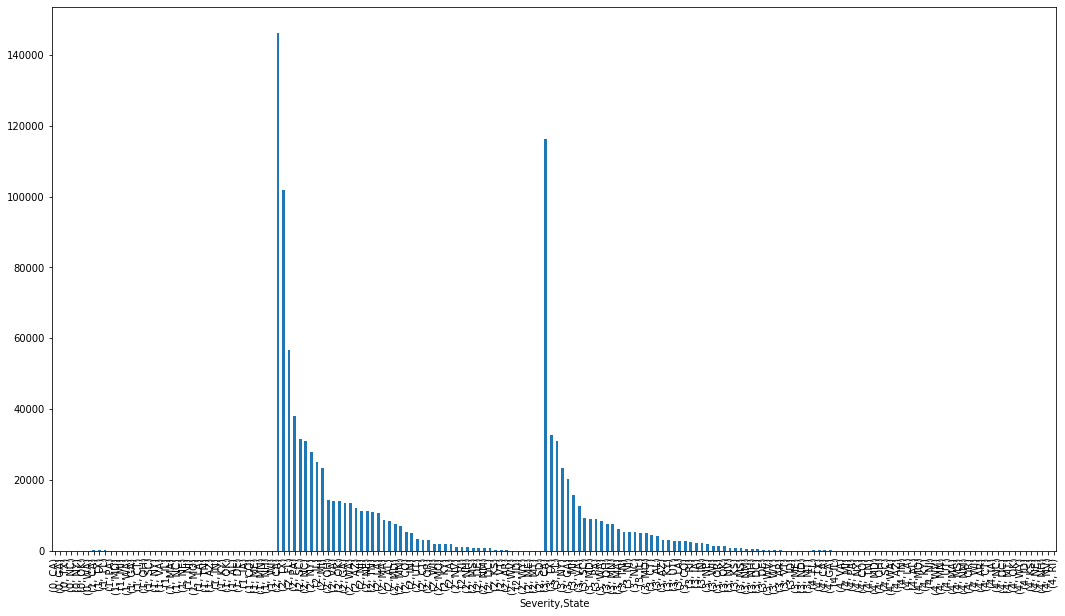

In [9]:
# How can I make this graph to look better?????
plt.figure(figsize=(18,10))
df.groupby('Severity')['State'].value_counts().plot(kind = 'bar')

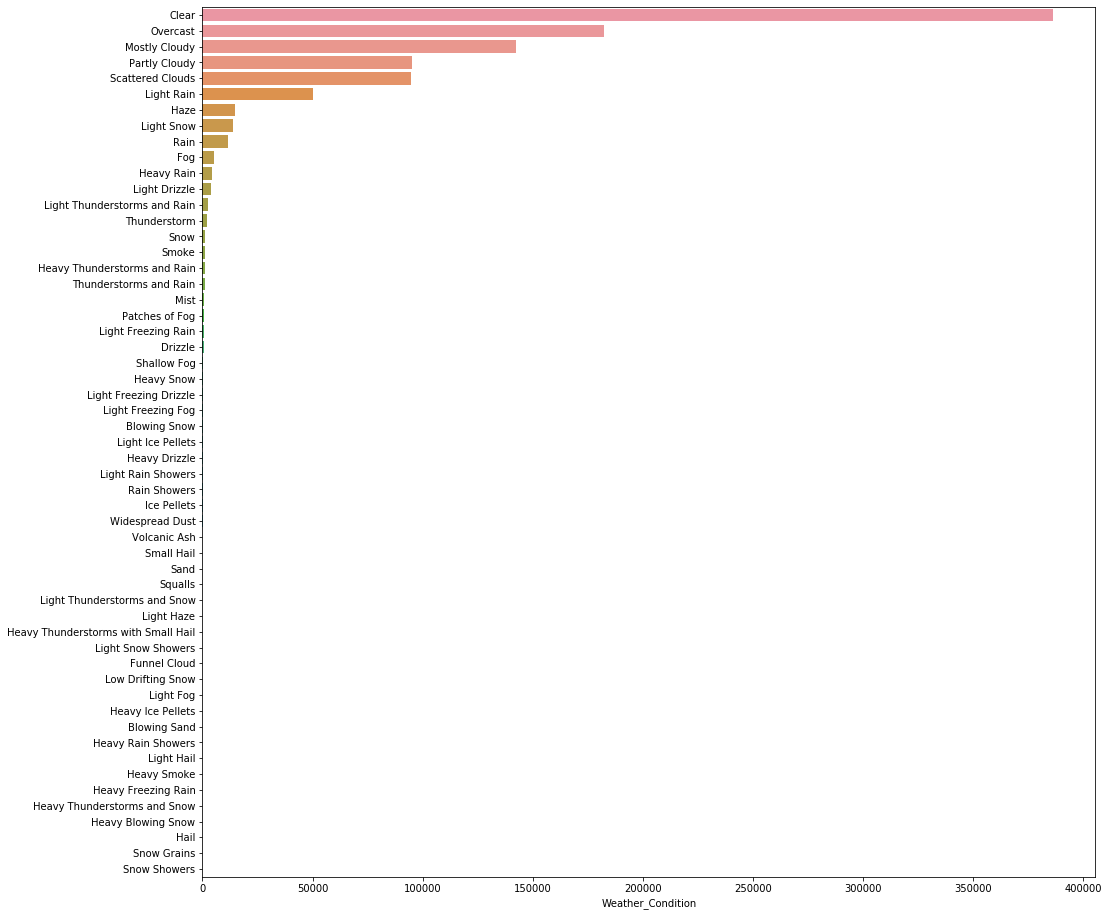

In [10]:
# Now we want to visualize the Wather Conditions distribution:
plt.figure(figsize=(16,16))
sns.barplot(df.Weather_Condition.value_counts(),df.Weather_Condition.value_counts().index)
plt.show()

### How can I change the fontsize????

<Figure size 1296x720 with 0 Axes>

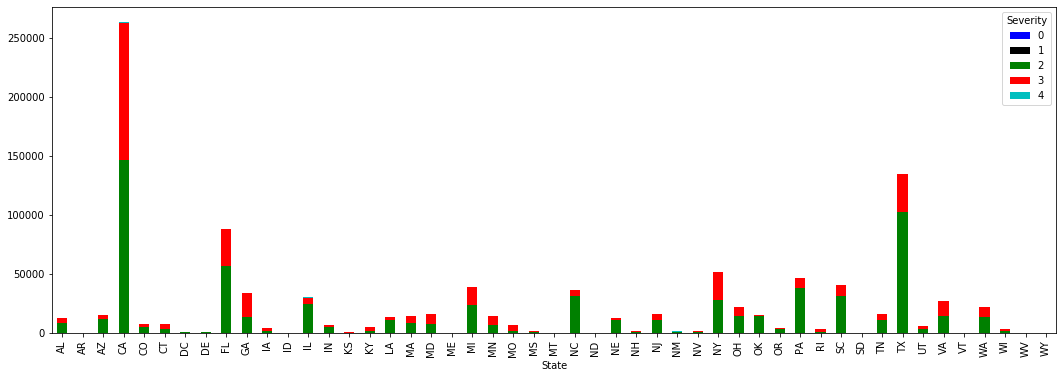

In [11]:
# Now we, will make a cross tab to visualize the severity of accidents in each state
plt.figure(figsize=(18,10))
x = pd.crosstab(index=df['State'],columns=df['Severity'])
x.plot(kind='bar',stacked=True, color=['b','k','g','r','c'],figsize=(18,6))
plt.show()

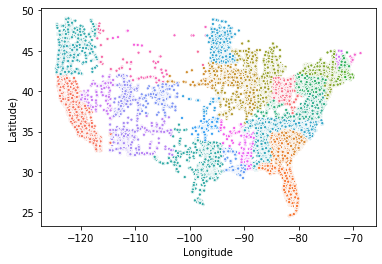

In [12]:
# Let'scheck the accident data on a map
sns.scatterplot(x='Start_Lng', y='Start_Lat',hue='State', data=df, s=10, legend = False)
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.show()

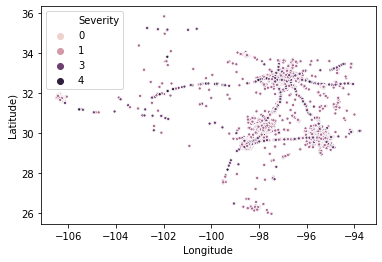

In [13]:
# Here we can see the map of the severity of the accidents in Texas
sns.scatterplot(x='Start_Lng', y='Start_Lat',hue='Severity', data=df.loc[df.State=='TX'], s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.show()

From this map, we can observe that the more severe accidents are more likely to appear in some ceratin roads

In [14]:
import calendar

Text(0, 0.5, 'Number of Accidents')

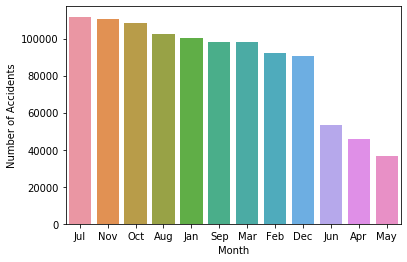

In [15]:
sns.barplot(df['Month'].value_counts().index, df['Month'].value_counts())
plt.xlabel('Month')
plt.ylabel('Number of Accidents')

Text(0, 0.5, 'Number of Accidents')

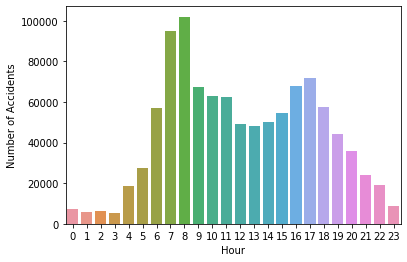

In [16]:
sns.barplot(df['Hour'].value_counts().index, df['Hour'].value_counts())
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')

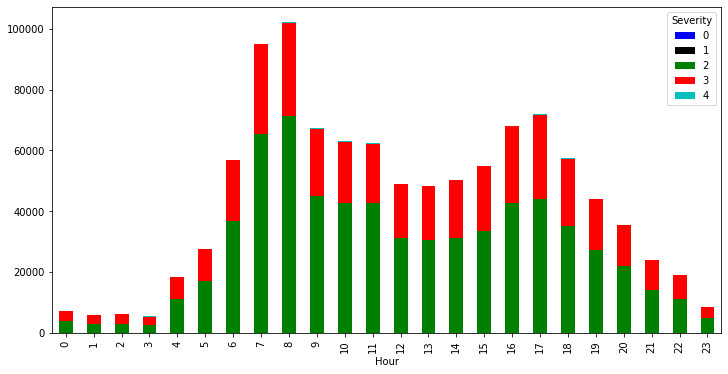

In [17]:
x = pd.crosstab(index=df['Hour'],columns=df['Severity'])
x.plot(kind='bar',stacked=True, color=['b','k','g','r','c'],figsize=(12,6))
plt.show()

In [18]:
feature_names = [c for c in df.columns if df[c].dtype != object]
feature_names_df = pd.DataFrame(feature_names)

In [19]:
feature_names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
0    50 non-null object
dtypes: object(1)
memory usage: 528.0+ bytes


In [20]:
type(feature_names_df)

pandas.core.frame.DataFrame

In [21]:
st = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
end = pd.to_datetime(df.End_Time, format='%Y-%m-%d %H:%M:%S')

In [22]:
diff = end-st
df['Duration'] = diff.astype('timedelta64[m]')

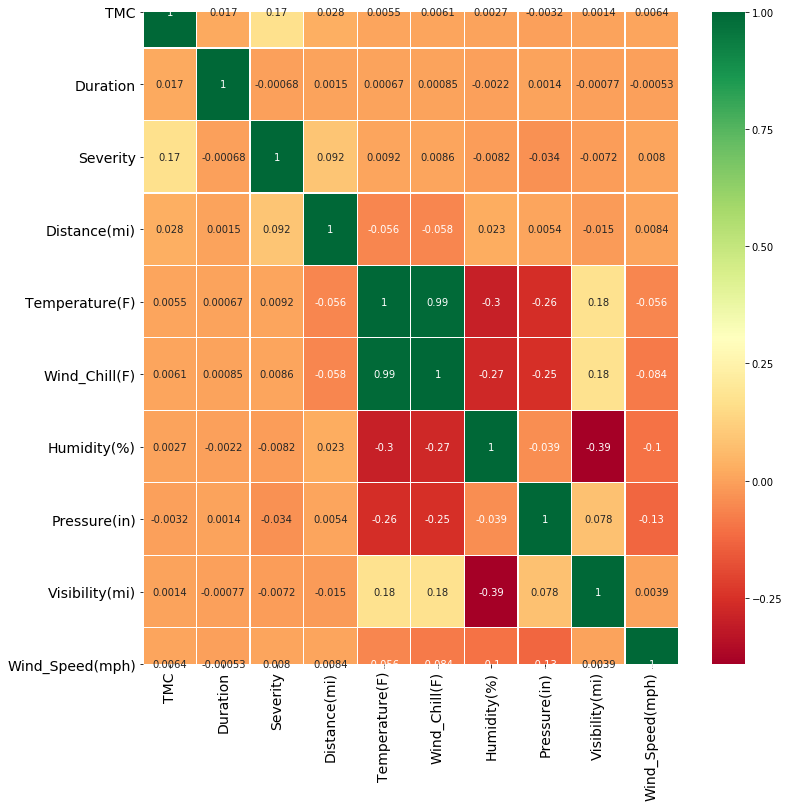

In [23]:
# Now we will make a HeatMap by using Seaborn Library
fig=sns.heatmap(df[['TMC','Duration','Severity','Distance(mi)','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [24]:
# We will define the top severity state by getting the mean of the severities of each states
df_top_Severity_State = df.groupby('State').agg({'Severity': 'mean'}).sort_values('Severity').reset_index()

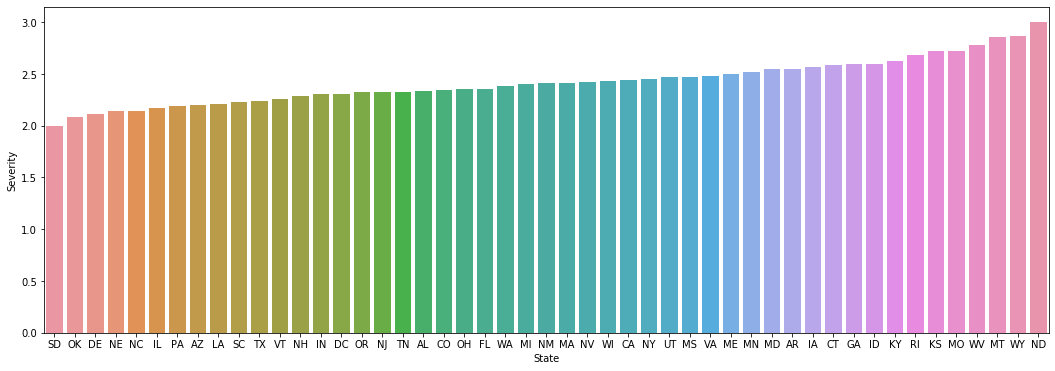

In [25]:
plt.figure(figsize=(18,6))
sns.barplot(y="Severity", x="State", data=df_top_Severity_State)
plt.ioff()

In [26]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


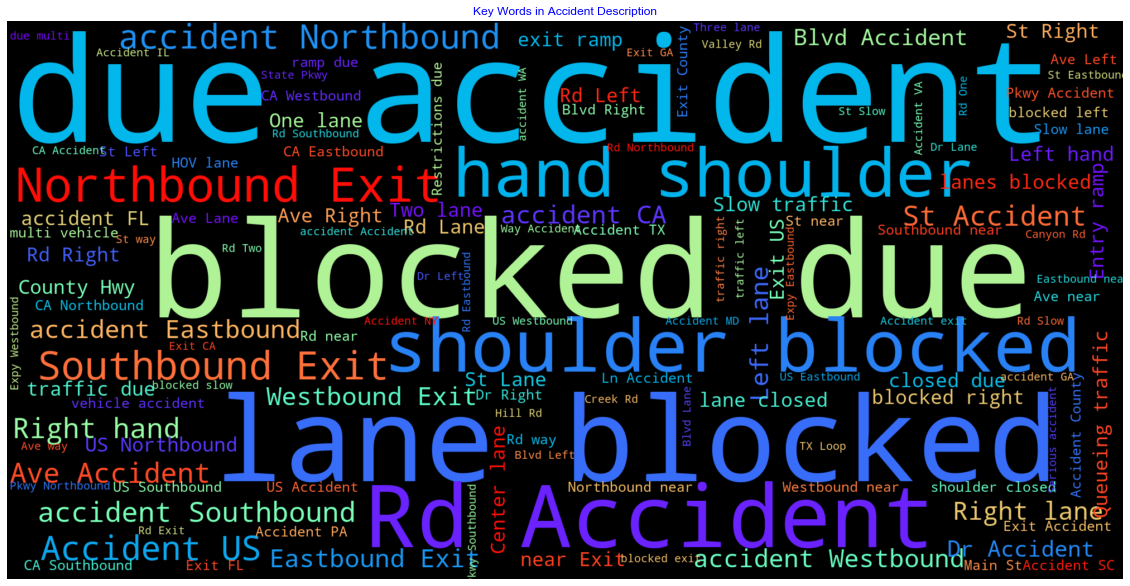

In [27]:
from wordcloud import WordCloud
plt.style.use('seaborn')
wrds1 = df["Description"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="black").generate(" ".join(wrds1))
plt.figure(figsize=(20,14))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Key Words in Accident Description",color='b')
plt.show()